In [70]:
from pyaudi import gdual
from pyaudi import sin, cos, tanh
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [167]:
import nn
n_units = [3, 10, 10, 2]
order = 1

In [168]:
def step(state, u, t):
    state[2] += u[0]
    state[0] += sin(state[2])*u[1]*t
    state[1] += cos(state[2])*u[1]*t
    return state
    

In [183]:
x = 5
y = 5
theta = 0

In [184]:
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

In [ ]:
t = 0.1
for epoch in range(200):
    traj = []
    state = [x,y, theta]
    traj.append((state[0], state[1]))
    for i in range(10):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]
        u[1] = N[1]
        state = step(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))
    loss = (state[0]**2 + state[1]**2)
    print(loss.constant_cf)
    weights, biases = nn.GD_update(loss, weights, biases, 0.0001) 
    trajs.append(traj)

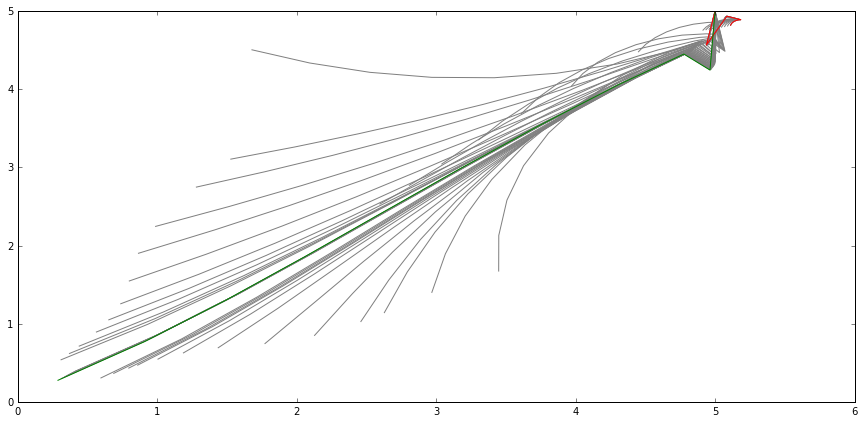

In [244]:
plt.rcParams['figure.figsize'] = (15,7)

    
for i, epoch in enumerate(range(10)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')

for i, epoch in enumerate(np.arange(0, len(trajs), len(trajs)/40)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')
    
    
traj = np.asarray(trajs[0])
plt.plot(traj[:,0], traj[:,1], color='red')
    
traj = np.asarray(trajs[-1])
plt.plot(traj[:,0], traj[:,1], color='green')
    